In [1]:
from util.preprocessing import refine, initialize_tokenizer, vectorize
from util.embeddings import load_glove, load_word2vec_pretrained
from sklearn.datasets import fetch_20newsgroups
from util.NLP import NLPModel
from util.constants import TEST_SIZE, GLOVE, WORD2VEC, MODEL_TYPE_CNN, MODEL_TYPE_LSTM, MODEL_TYPE_CNN_LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from util.graphs import plotModelComparison, plotEmbeddingComparison, average_accuracy_for_all_models,  average_accuracy_for_all_embeddings
import numpy as np

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers'))
texts = newsgroups.data
labels = newsgroups.target

In [3]:
refined_texts = refine(texts)
tokenizer = initialize_tokenizer(refined_texts)
preprocessed_texts = vectorize(tokenizer, refined_texts)

In [4]:
glove_embedding_index = load_glove()

Found 400000 word vectors.


In [5]:
word2vec_pretrained_embedding_index = load_word2vec_pretrained()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_texts, labels, test_size=TEST_SIZE, shuffle=True)

In [7]:
glove_CNN = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_CNN,
                     tokenizer=tokenizer, 
                     embeddings=glove_embedding_index)

glove_LSTM = NLPModel(word_embedding=GLOVE,
                     model_type=MODEL_TYPE_LSTM,
                     tokenizer=tokenizer,
                     embeddings=glove_embedding_index)

glove_CNN_LSTM = NLPModel(word_embedding=GLOVE,
                          model_type=MODEL_TYPE_CNN_LSTM,
                          tokenizer=tokenizer,
                          embeddings=glove_embedding_index)

word2vec_CNN = NLPModel(word_embedding=WORD2VEC,
                        model_type=MODEL_TYPE_CNN,
                        tokenizer=tokenizer,
                        embeddings=word2vec_pretrained_embedding_index)


word2vec_LSTM = NLPModel(word_embedding=WORD2VEC,
                         model_type=MODEL_TYPE_LSTM,
                         tokenizer=tokenizer,
                         embeddings=word2vec_pretrained_embedding_index)

word2vec_CNN_LSTM = NLPModel(word_embedding=WORD2VEC,
                             model_type=MODEL_TYPE_CNN_LSTM,
                             tokenizer=tokenizer,
                             embeddings=word2vec_pretrained_embedding_index)


In [8]:
glove_CNN.train(x_train, y_train)
glove_LSTM.train(x_train, y_train)
glove_CNN_LSTM.train(x_train, y_train)
word2vec_CNN.train(x_train, y_train)
word2vec_LSTM.train(x_train, y_train)
word2vec_CNN_LSTM.train(x_train, y_train)

Epoch 1/30
106/106 [==============================] - 52s 447ms/step - loss: 2.8779 - accuracy: 0.0873 - val_loss: 2.5090 - val_accuracy: 0.1771
Epoch 2/30
106/106 [==============================] - 46s 432ms/step - loss: 2.1755 - accuracy: 0.2630 - val_loss: 1.6219 - val_accuracy: 0.4794
Epoch 3/30
106/106 [==============================] - 47s 445ms/step - loss: 1.5955 - accuracy: 0.4548 - val_loss: 1.1671 - val_accuracy: 0.6187
Epoch 4/30
106/106 [==============================] - 48s 449ms/step - loss: 1.3132 - accuracy: 0.5541 - val_loss: 1.0538 - val_accuracy: 0.6492
Epoch 5/30
106/106 [==============================] - 47s 446ms/step - loss: 1.1699 - accuracy: 0.6119 - val_loss: 0.9756 - val_accuracy: 0.6890
Epoch 6/30
106/106 [==============================] - 46s 434ms/step - loss: 1.0808 - accuracy: 0.6435 - val_loss: 0.9210 - val_accuracy: 0.7023
Epoch 7/30
106/106 [==============================] - 47s 447ms/step - loss: 0.9955 - accuracy: 0.6739 - val_loss: 0.8800 - val_ac

In [9]:
models = [glove_CNN, glove_LSTM, glove_CNN_LSTM, word2vec_CNN, word2vec_LSTM, word2vec_CNN_LSTM]

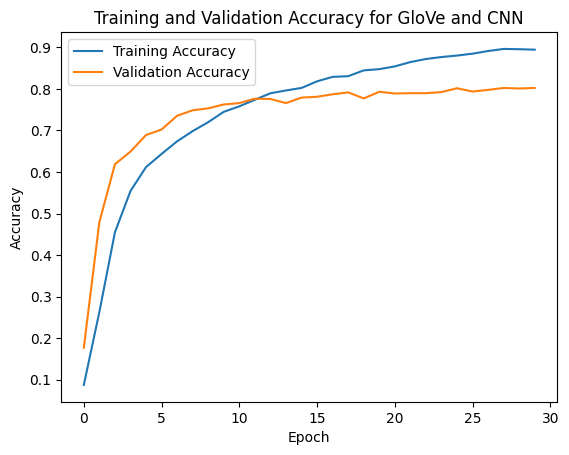

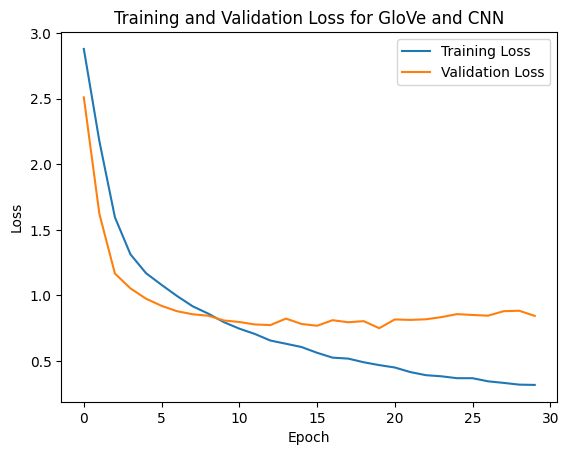

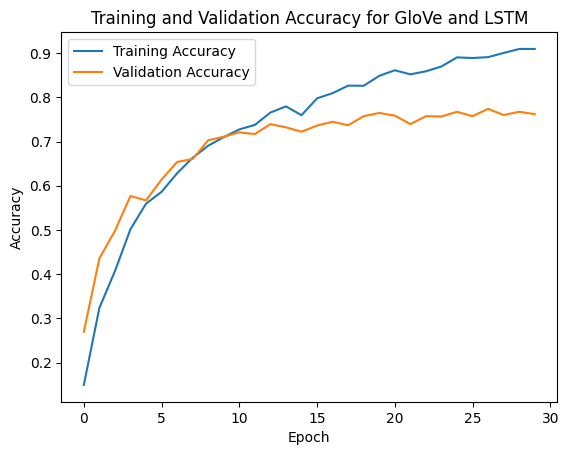

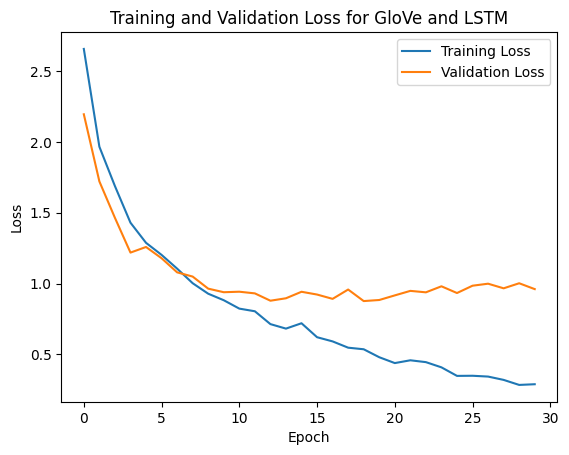

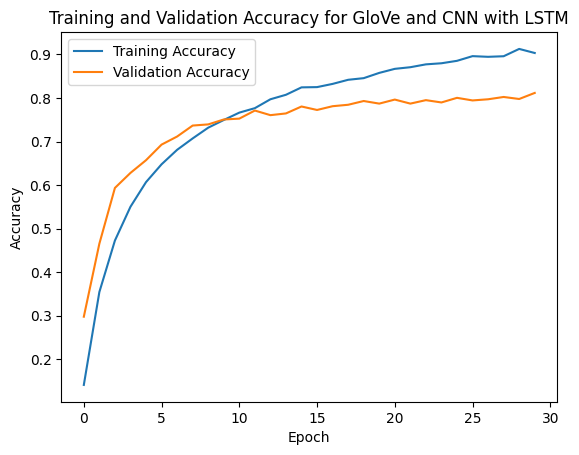

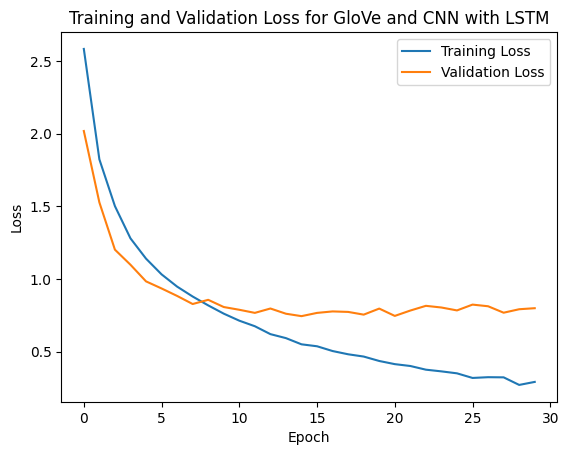

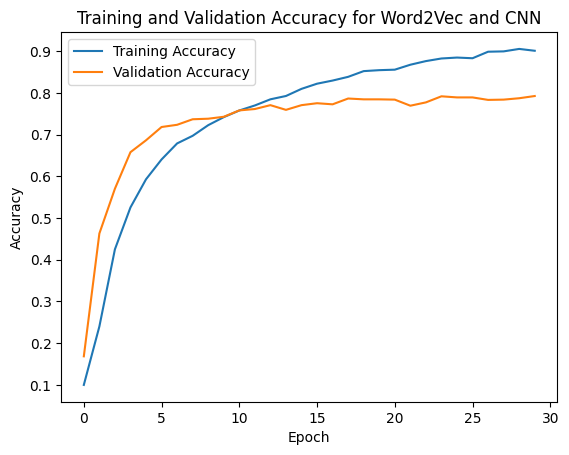

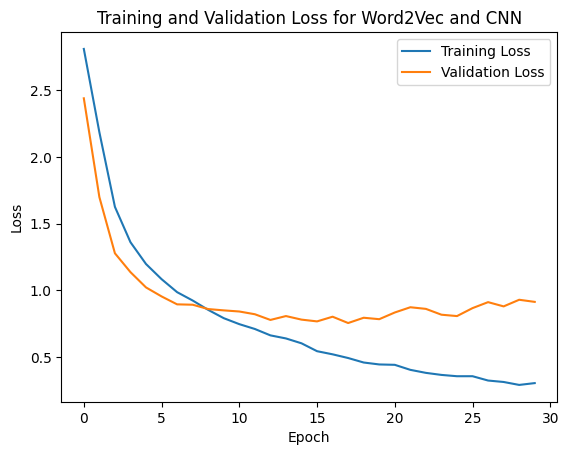

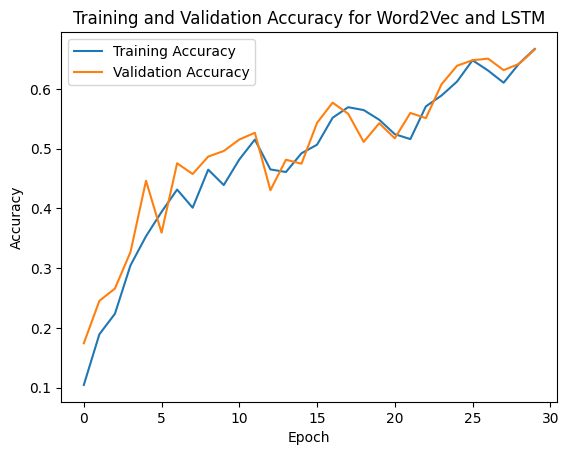

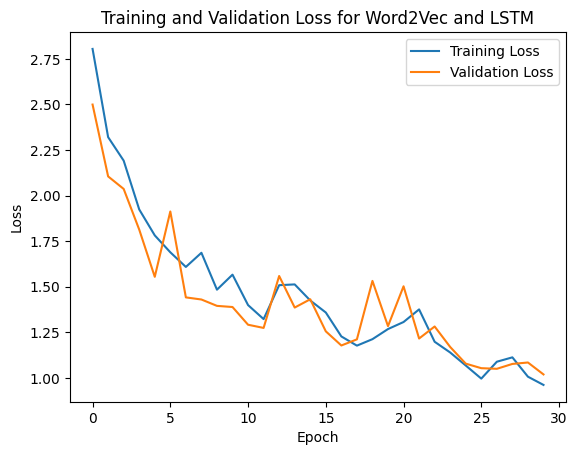

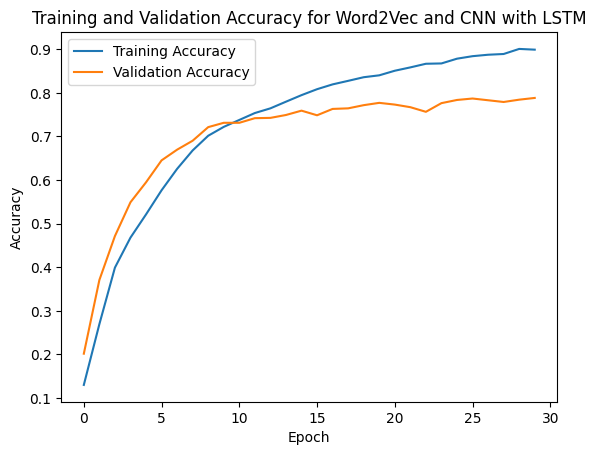

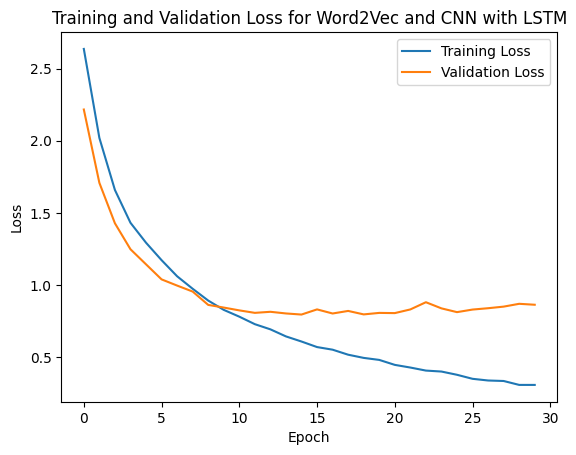

In [10]:
# Accuracy and loss plots for all combinations
for model in models:
    model.plot_accuracy()
    model.plot_loss()

In [11]:
glove_cnn_acc = glove_CNN.model_history.history['val_accuracy']
glove_lstm_acc = glove_LSTM.model_history.history['val_accuracy']
glove_combo_acc = glove_CNN_LSTM.model_history.history['val_accuracy']
word2vec_cnn_acc = word2vec_CNN.model_history.history['val_accuracy']
word2vec_lstm_acc = word2vec_LSTM.model_history.history['val_accuracy']
word2vec_combo_acc = word2vec_CNN_LSTM.model_history.history['val_accuracy']

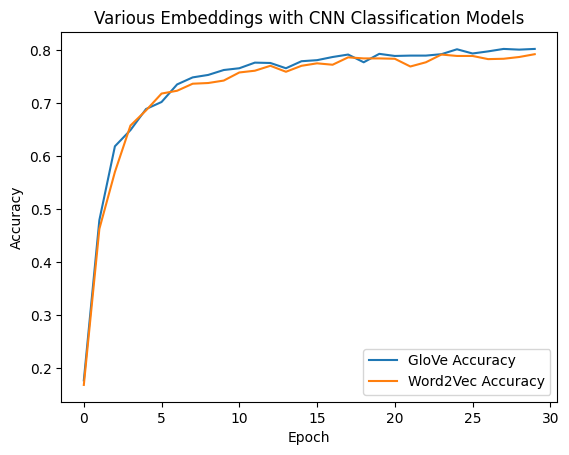

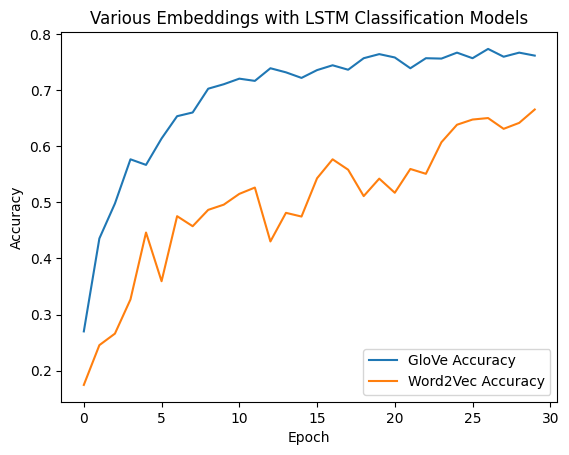

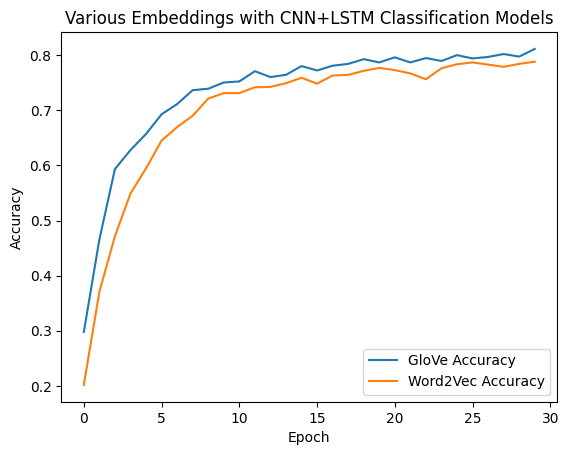

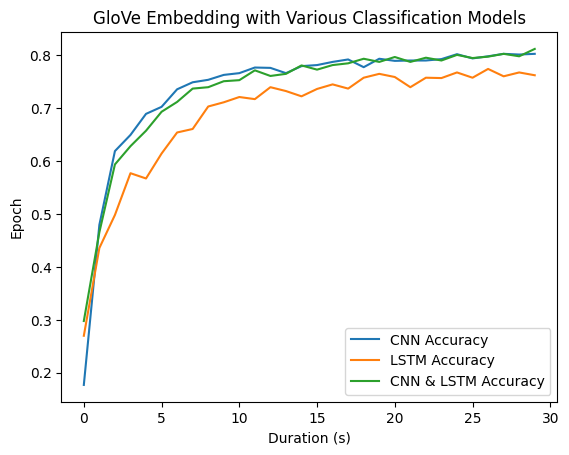

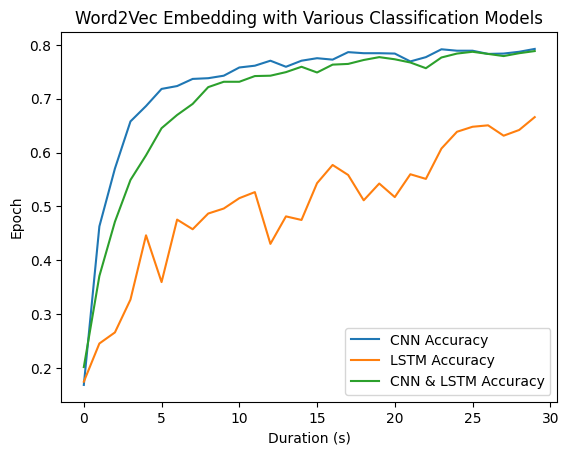

In [12]:
plotEmbeddingComparison("CNN", glove_cnn_acc, word2vec_cnn_acc)
plotEmbeddingComparison("LSTM", glove_lstm_acc, word2vec_lstm_acc)
plotEmbeddingComparison("CNN+LSTM", glove_combo_acc, word2vec_combo_acc)

plotModelComparison("GloVe", glove_cnn_acc, glove_lstm_acc, glove_combo_acc)
plotModelComparison("Word2Vec", word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)

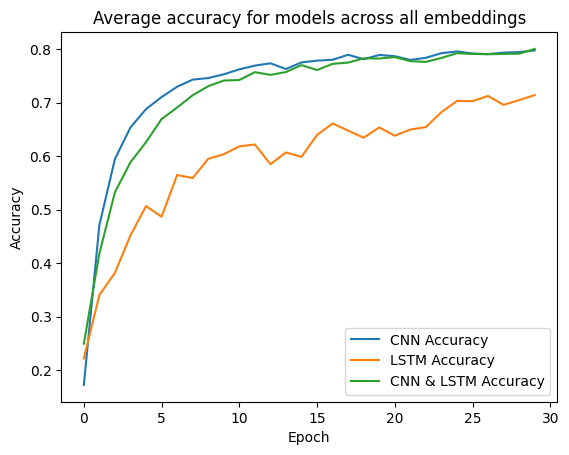

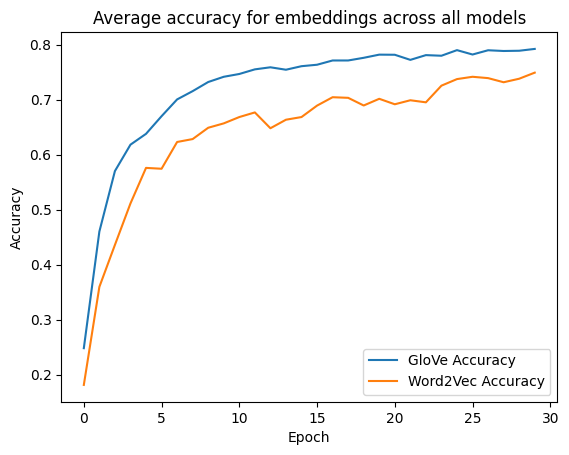

In [13]:
average_accuracy_for_all_embeddings(glove_cnn_acc, glove_lstm_acc, glove_combo_acc, word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)
average_accuracy_for_all_models(glove_cnn_acc, glove_lstm_acc, glove_combo_acc, word2vec_cnn_acc, word2vec_lstm_acc, word2vec_combo_acc)

In [14]:
print("GloVe CNN:")
glove_CNN.evaluate(x_test=x_test, y_test=y_test)
print("GloVe LSTM:")
glove_LSTM.evaluate(x_test=x_test, y_test=y_test)
print("GloVe CNN with LSTM:")
glove_CNN_LSTM.evaluate(x_test=x_test, y_test=y_test)

print("Word2Vec CNN:")
word2vec_CNN.evaluate(x_test=x_test, y_test=y_test)
print("Word2Vec LSTM:")
word2vec_LSTM.evaluate(x_test=x_test, y_test=y_test)
print("Word2Vec CNN with LSTM:")
word2vec_CNN_LSTM.evaluate(x_test=x_test, y_test=y_test)

GloVe CNN:
118/118 [==============================] - 5s 38ms/step
Model accuracy is: 0.8068965517241379
GloVe LSTM:
118/118 [==============================] - 14s 109ms/step
Model accuracy is: 0.7612732095490716
GloVe CNN with LSTM:
118/118 [==============================] - 6s 40ms/step
Model accuracy is: 0.8029177718832892
Word2Vec CNN:
118/118 [==============================] - 5s 37ms/step
Model accuracy is: 0.7981432360742705
Word2Vec LSTM:
118/118 [==============================] - 7s 52ms/step
Model accuracy is: 0.6511936339522546
Word2Vec CNN with LSTM:
118/118 [==============================] - 4s 33ms/step
Model accuracy is: 0.7848806366047746
